In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Stock prices

## Import Stock prices

In [2]:
stock_prices = pd.read_csv('../../../data/team/Stock Price Time Series/stock_prices_time_series_converged.csv')

In [3]:
stock_prices['Date'] = pd.to_datetime(stock_prices['timestamp'], errors='coerce')

In [4]:
stock_prices.drop(columns=['Unnamed: 9','Unnamed: 10'], inplace=True)
stock_prices.drop(columns=['mean delta', '-0.073169045'], inplace=True)

In [5]:
stock_prices.set_index('Date', inplace=True);

In [6]:
stock_prices.drop(['timestamp'],axis=1, inplace=True)

In [159]:
pd.DataFrame(stock_prices[stock_prices['Ticker']=='FSLR']['close']).head(10)

,close
Date,
2021-04-23,88.56
2021-04-22,87.15
2021-04-21,83.65
2021-04-20,79.36
2021-04-19,80.21
2021-04-16,80.14
2021-04-15,77.17
2021-04-14,78.57
2021-04-13,78.99


## Export GCTAY close prices

In [7]:
stock_prices['Ticker'].unique()

array(['SPWR', 'COENF', 'DNNGY', 'DQ', 'ENPH', 'FSLR', 'GCTAY', 'ORA',
       'RUN', 'SCTY', 'TSLA', 'VWDRY'], dtype=object)

In [8]:
stock_prices_gctay = stock_prices[stock_prices['Ticker'] == 'GCTAY'].copy()

In [9]:
stock_prices_gctay.sort_index(ascending=True, inplace=True)

In [10]:
gctay_closing_daily = pd.DataFrame(stock_prices_gctay['close'])

In [11]:
gctay_closing_daily

,close
Date,
2009-02-05,3.290
2009-02-06,3.290
2009-02-09,3.290
2009-02-10,3.500
2009-02-11,3.500
...,...
2021-04-19,7.150
2021-04-20,6.990
2021-04-21,7.272


# Import Sentiment 

In [12]:
sentiment = pd.read_csv('../../../data/team/NLTK Time Series/sentiment_nltk_fixed_final.csv')

In [13]:
sentiment.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
sentiment['Date'] = pd.to_datetime(sentiment['CreatedAt'].str[:10], errors='coerce')

In [15]:
sentiment.set_index('Date',inplace=True);

In [16]:
sentiment.drop('CreatedAt', axis=1, inplace=True)

In [17]:
sentiment

,company,TweetText,Tweet_lemmatized,neg,neu,pos,compound
Date,,,,,,,
2021-04-01,first_solar,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,"['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...",0.000,0.000,0.000,0.0000
2021-03-31,first_solar,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,"['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...",0.000,1.000,0.000,0.0000
2021-03-31,first_solar,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...",0.000,0.927,0.073,0.2023
2021-03-31,first_solar,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']",0.081,0.848,0.071,-0.0754
2021-03-31,first_solar,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,"['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
2011-01-10,meridian_energy,Panic Attacks Cure: Anxiety And Panic Attacks Cure - Energy Healing - Meridian Energy Therapy - ...,"['panic', 'attack', 'cure', 'anxiety', 'panic', 'attack', 'cure', 'energy', 'healing', 'meridian...",0.537,0.222,0.241,-0.8402
2011-01-07,meridian_energy,Just had some Meridian Energy guys come around saying they could save me a lot money. Said I was...,"['meridian', 'energy', 'guy', 'come', 'around', 'saying', 'could', 'save', 'lot', 'money', 'said...",0.537,0.222,0.241,-0.8402
2011-01-06,meridian_energy,EFT Cafe - Gratitude Tapping: AAMET - Association for the Advancement of Meridian Energy Techniq...,"['eft', 'cafe', 'gratitude', 'tapping', 'aamet', 'association', 'advancement', 'meridian', 'ener...",0.122,0.609,0.269,0.4393


## Create daily tweet count 

In [18]:
sentiment['company'].unique()

array(['first_solar', 'siemens_gamesa', 'plug_power', 'tesla', 'sunrun',
       'sunpower', 'meridian_energy', nan], dtype=object)

In [19]:
gctay_tweets = sentiment[sentiment['company'] == 'siemens_gamesa']

In [20]:
gctay_tweets_daily = gctay_tweets.groupby(['Date']).count()

In [21]:
gctay_tweets_daily = pd.DataFrame(gctay_tweets_daily['compound'])

In [22]:
gctay_tweets_daily.rename(columns={'compound':'Daily Tweets'},inplace=True)

In [23]:
gctay_tweets_daily

,Daily Tweets
Date,
2011-01-01,2
2011-01-02,2
2011-01-03,5
2011-01-04,6
2011-01-05,5
...,...
2021-03-28,51
2021-03-29,118
2021-03-30,129


## Create pos sentiment mean

In [24]:
gctay_sentiment = sentiment[sentiment['company'] == 'siemens_gamesa']

In [25]:
gctay_sentiment = pd.DataFrame(gctay_sentiment['pos'])

In [26]:
gctay_sentiment_daily = gctay_sentiment.groupby(['Date']).mean()

In [27]:
gctay_sentiment_daily

,pos
Date,
2011-01-01,0.425000
2011-01-02,0.241500
2011-01-03,0.255800
2011-01-04,0.209000
2011-01-05,0.298200
...,...
2021-03-28,0.227216
2021-03-29,0.164941
2021-03-30,0.231884


## Create pos sentiment mean

In [28]:
gctay_sentiment_compound = pd.DataFrame(sentiment[sentiment['company'] == 'siemens_gamesa']['compound']).groupby(['Date']).mean()

In [29]:
gctay_sentiment_compound

,compound
Date,
2011-01-01,0.660500
2011-01-02,0.273200
2011-01-03,0.470360
2011-01-04,0.322400
2011-01-05,0.477660
...,...
2021-03-28,0.480627
2021-03-29,0.280736
2021-03-30,0.430319


## Create neg sentiment mean

In [88]:
gctay_sentiment_neg = pd.DataFrame(sentiment[sentiment['company'] == 'siemens_gamesa']['neg']).groupby(['Date']).mean()

In [89]:
gctay_sentiment_neg

,neg
Date,
2011-01-01,0.000000
2011-01-02,0.000000
2011-01-03,0.000000
2011-01-04,0.000000
2011-01-05,0.000000
...,...
2021-03-28,0.026745
2021-03-29,0.038805
2021-03-30,0.021946


# Merge Siemens datasets

In [30]:
gctay = pd.merge(gctay_closing_daily, gctay_tweets_daily, how='left', left_on=['Date'], right_on=['Date'] )

In [31]:
gctay.dropna(inplace=True)

In [32]:
gctay = pd.merge(gctay, gctay_sentiment_daily,how='left', left_on=['Date'], right_on=['Date'] )

In [34]:
gctay = pd.merge(gctay, gctay_sentiment_compound ,how='left', left_on=['Date'], right_on=['Date'])

In [90]:
gctay = pd.merge(gctay, gctay_sentiment_neg ,how='left', left_on=['Date'], right_on=['Date'])

In [91]:
gctay.rename(columns={'close':'Closing Price', 'pos':'Pos Sentiment','compound':'Compound Sentiment','neg':'Neg Sentiment'}, inplace=True)

In [92]:
gctay

,Closing Price,Daily Tweets,Pos Sentiment,Compound Sentiment,Neg Sentiment
Date,,,,,
2011-01-03,1.6900,5.0,0.255800,0.470360,0.000000
2011-01-04,1.6900,6.0,0.209000,0.322400,0.000000
2011-01-05,1.6900,5.0,0.298200,0.477660,0.000000
2011-01-06,1.6900,3.0,0.232667,0.391933,0.000000
2011-01-07,1.6900,4.0,0.138250,0.241975,0.000000
...,...,...,...,...,...
2021-03-26,6.8900,95.0,0.182453,0.331604,0.009695
2021-03-29,6.9400,118.0,0.164941,0.280736,0.038805
2021-03-30,7.3225,129.0,0.231884,0.430319,0.021946


In [38]:
# gctay.to_csv('./gctay_closing_popularity_sentiment_pos.csv')

# Normalized SPWR data

In [93]:
gctay_normalized = gctay.copy()

In [94]:
gctay_normalized

,Closing Price,Daily Tweets,Pos Sentiment,Compound Sentiment,Neg Sentiment
Date,,,,,
2011-01-03,1.6900,5.0,0.255800,0.470360,0.000000
2011-01-04,1.6900,6.0,0.209000,0.322400,0.000000
2011-01-05,1.6900,5.0,0.298200,0.477660,0.000000
2011-01-06,1.6900,3.0,0.232667,0.391933,0.000000
2011-01-07,1.6900,4.0,0.138250,0.241975,0.000000
...,...,...,...,...,...
2021-03-26,6.8900,95.0,0.182453,0.331604,0.009695
2021-03-29,6.9400,118.0,0.164941,0.280736,0.038805
2021-03-30,7.3225,129.0,0.231884,0.430319,0.021946


In [125]:
def normalize_daily_tweets(df):
    max_count = df['Daily Tweets'].max()
    min_count = df['Daily Tweets'].min()
    df['Daily Tweets'] = (df['Daily Tweets'] - min_count) / (max_count - min_count)
    return df

def normalize_pos_sentiment(df):
    max_count = df['Pos Sentiment'].max()
    min_count = df['Pos Sentiment'].min()
    df['Pos Sentiment'] = (df['Pos Sentiment'] - min_count) / (max_count - min_count)
    return df

def normalize_neg_sentiment(df):
    max_count = df['Neg Sentiment'].max()
    min_count = df['Neg Sentiment'].min()
    df['Neg Sentiment'] = (df['Neg Sentiment'] - min_count) / (max_count - min_count)
    return df


def normalize_compound_sentiment(df):
    max_count = df['Compound Sentiment'].max()
    min_count = df['Compound Sentiment'].min()
    df['Compound Sentiment'] = (df['Compound Sentiment'] - min_count) / (max_count - min_count)
    return df


def normalize_closing_price(df):
    max_count = df['Closing Price'].max()
    min_count = df['Closing Price'].min()
    df['Closing Price'] = (df['Closing Price'] - min_count) / (max_count - min_count)
    return df

In [126]:
gctay_normalized = normalize_daily_tweets(gctay_normalized)

In [127]:
gctay_normalized = normalize_pos_sentiment(gctay_normalized)

In [128]:
gctay_normalized = normalize_neg_sentiment(gctay_normalized)

In [129]:
gctay_normalized = normalize_compound_sentiment(gctay_normalized)

In [130]:
gctay_normalized =  normalize_closing_price(gctay_normalized)

In [131]:
gctay_normalized

,Closing Price,Daily Tweets,Pos Sentiment,Compound Sentiment,Neg Sentiment
Date,,,,,
2011-01-03,0.151872,0.010076,0.397514,0.654792,0.397514
2011-01-04,0.151872,0.012594,0.324786,0.508204,0.324786
2011-01-05,0.151872,0.010076,0.463403,0.662024,0.463403
2011-01-06,0.151872,0.005038,0.361564,0.577093,0.361564
2011-01-07,0.151872,0.007557,0.214841,0.428525,0.214841
...,...,...,...,...,...
2021-03-26,0.708021,0.236776,0.283532,0.517323,0.283532
2021-03-29,0.713369,0.294710,0.256318,0.466927,0.256318
2021-03-30,0.754278,0.322418,0.360348,0.615123,0.360348


In [132]:
# gctay_normalized.to_csv('./gctay_normalized_closing_popularity_sentiment_pos.csv')

<AxesSubplot:xlabel='Date'>

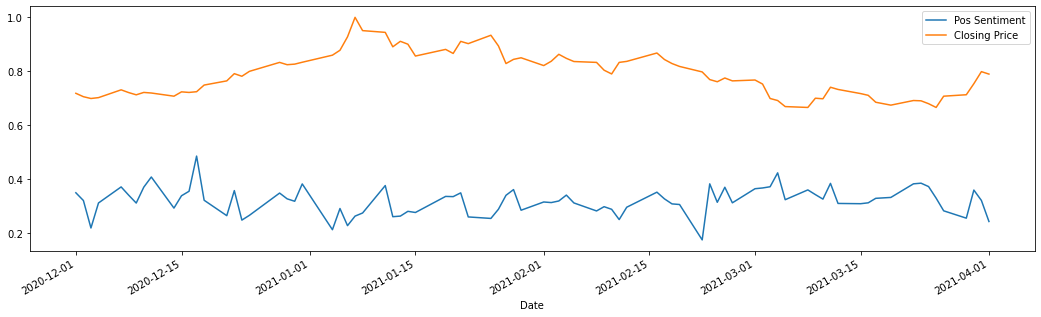

In [133]:
gctay_normalized[['Pos Sentiment','Closing Price']]['2020-12-01':'2021-04-01'].plot(figsize=(18,5))

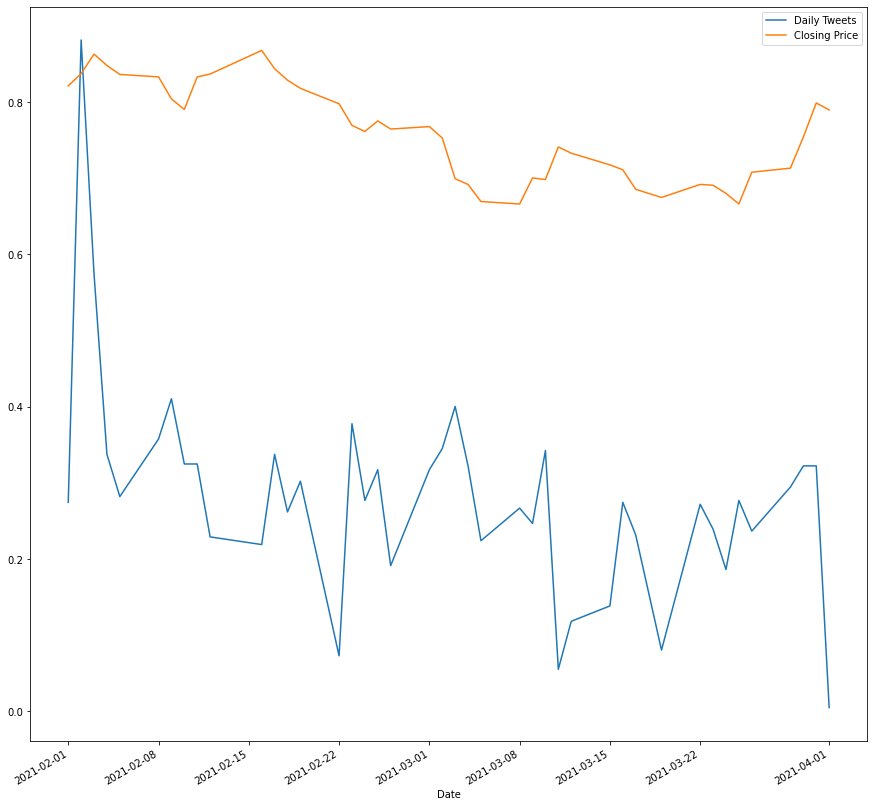

In [134]:
gctay_normalized[['Daily Tweets','Closing Price']]['2021-02-01':'2021-04-01'].plot(figsize=(15,15));

# Lag Analysis

In [135]:
gctay

,Closing Price,Daily Tweets,Pos Sentiment,Compound Sentiment,Neg Sentiment
Date,,,,,
2011-01-03,1.6900,5.0,0.255800,0.470360,0.000000
2011-01-04,1.6900,6.0,0.209000,0.322400,0.000000
2011-01-05,1.6900,5.0,0.298200,0.477660,0.000000
2011-01-06,1.6900,3.0,0.232667,0.391933,0.000000
2011-01-07,1.6900,4.0,0.138250,0.241975,0.000000
...,...,...,...,...,...
2021-03-26,6.8900,95.0,0.182453,0.331604,0.009695
2021-03-29,6.9400,118.0,0.164941,0.280736,0.038805
2021-03-30,7.3225,129.0,0.231884,0.430319,0.021946


In [51]:
gctay_normalized

,Closing Price,Daily Tweets,Pos Sentiment,Compound Sentiment
Date,,,,
2011-01-03,0.151872,0.010076,0.397514,0.654792
2011-01-04,0.151872,0.012594,0.324786,0.508204
2011-01-05,0.151872,0.010076,0.463403,0.662024
2011-01-06,0.151872,0.005038,0.361564,0.577093
2011-01-07,0.151872,0.007557,0.214841,0.428525
...,...,...,...,...
2021-03-26,0.708021,0.236776,0.283532,0.517323
2021-03-29,0.713369,0.294710,0.256318,0.466927
2021-03-30,0.754278,0.322418,0.360348,0.615123


In [136]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Compound Sentiment'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=False, maxlags=20, normed=True)
    ax1.grid(True)
    plt.show()

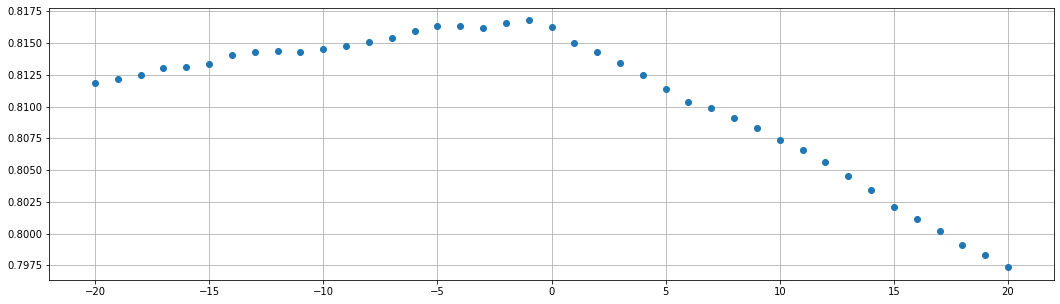

In [86]:
plot_cross_correlation(gctay)

In [143]:
def plot_cross_correlation_neg_sentiment(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Neg Sentiment'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=True, maxlags=1000, normed=True)
    ax1.grid(True)
    plt.show()

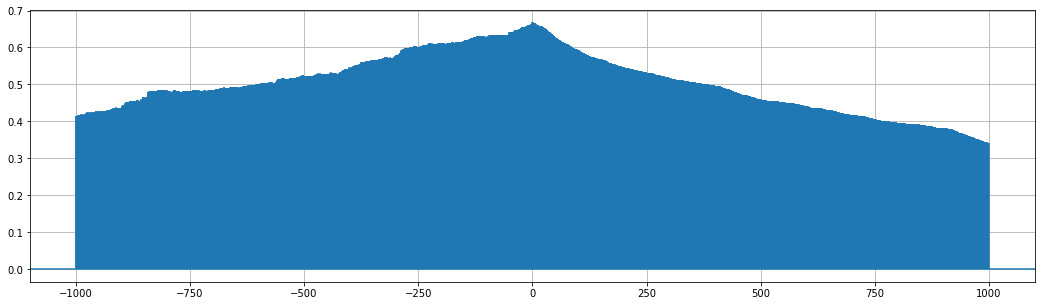

In [144]:
plot_cross_correlation_neg_sentiment(gctay)

# Granger Causality 

In [145]:
gctay.columns

Index(['Closing Price', 'Daily Tweets', 'Pos Sentiment', 'Compound Sentiment',
       'Neg Sentiment'],
      dtype='object')

In [147]:
data = np.asarray(gctay_normalized[['Pos Sentiment', 'Closing Price']]['2021-01-01':])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7851  , p=0.0044  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=9.2475  , p=0.0024  , df=1
likelihood ratio test: chi2=8.6005  , p=0.0034  , df=1
parameter F test:         F=8.7851  , p=0.0044  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.4255  , p=0.0031  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=14.0408 , p=0.0009  , df=2
likelihood ratio test: chi2=12.5954 , p=0.0018  , df=2
parameter F test:         F=6.4255  , p=0.0031  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1695  , p=0.0012  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=21.0488 , p=0.0001  , df=3
likelihood ratio test: chi2=17.9581 , p=0.0004  , df=3
parameter F test:         F=6.1695  , p=0.0012  , df_denom=51, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4151  , p=0.0040  , df_d

{1: ({'ssr_ftest': (8.785079837291551, 0.004426564454433729, 57.0, 1),
   'ssr_chi2test': (9.247452460306896, 0.002358232597160026, 1),
   'lrtest': (8.600507675512347, 0.003360693075284518, 1),
   'params_ftest': (8.785079837291555, 0.004426564454433694, 57.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.425472810923032, 0.003138539036274843, 54.0, 2),
   'ssr_chi2test': (14.040847994239218, 0.0008934465937462324, 2),
   'lrtest': (12.59540273637242, 0.0018405306205777328, 2),
   'params_ftest': (6.4254728109230275, 0.0031385390362748547, 54.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.169479409450612, 0.0011663839924151982, 51.0, 3),
   'ssr_chi2test': (21.0488121028315, 0.00010284723826776113, 3),
   'lrtest': (17.958106498371762, 0.0004486874770928802, 3),
   'params_ftest': (6.1694794094506475, 0.0011663839924151574, 51.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
      

In [61]:
data = np.asarray(gctay_normalized[['Compound Sentiment', 'Closing Price']])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1
ssr based chi2 test:   chi2=2.1152  , p=0.1458  , df=1
likelihood ratio test: chi2=2.1143  , p=0.1459  , df=1
parameter F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2
ssr based chi2 test:   chi2=4.3029  , p=0.1163  , df=2
likelihood ratio test: chi2=4.2993  , p=0.1165  , df=2
parameter F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3
ssr based chi2 test:   chi2=4.8767  , p=0.1811  , df=3
likelihood ratio test: chi2=4.8720  , p=0.1814  , df=3
parameter F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3589  , p=0.

{1: ({'ssr_ftest': (2.1127328753603063, 0.14620143723125364, 2547.0, 1),
   'ssr_chi2test': (2.1152213710910015, 0.14584096395462007, 1),
   'lrtest': (2.114344569370587, 0.14592451642185394, 1),
   'params_ftest': (2.112732875360597, 0.14620143723125364, 2547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.1472376139683154, 0.11701802494672243, 2544.0, 2),
   'ssr_chi2test': (4.302915627362607, 0.11631446929178685, 2),
   'lrtest': (4.2992878767508955, 0.11652564069674866, 2),
   'params_ftest': (2.1472376139682794, 0.11701802494674796, 2544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6210870200334735, 0.18237378964694229, 2541.0, 3),
   'ssr_chi2test': (4.876658473489127, 0.18105484129008237, 3),
   'lrtest': (4.87199766165395, 0.181413665862828, 3),
   'params_ftest': (1.6210870200334035, 0.18237378964694229, 2541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [150]:
data = np.asarray(gctay[['Compound Sentiment', 'Closing Price']])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1
ssr based chi2 test:   chi2=2.1152  , p=0.1458  , df=1
likelihood ratio test: chi2=2.1143  , p=0.1459  , df=1
parameter F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2
ssr based chi2 test:   chi2=4.3029  , p=0.1163  , df=2
likelihood ratio test: chi2=4.2993  , p=0.1165  , df=2
parameter F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3
ssr based chi2 test:   chi2=4.8767  , p=0.1811  , df=3
likelihood ratio test: chi2=4.8720  , p=0.1814  , df=3
parameter F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3589  , p=0.

{1: ({'ssr_ftest': (2.11273287536082, 0.14620143723121184, 2547.0, 1),
   'ssr_chi2test': (2.115221371091516, 0.14584096395457108, 1),
   'lrtest': (2.114344569366949, 0.1459245164222008, 1),
   'params_ftest': (2.112732875360447, 0.14620143723125364, 2547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.1472376139681173, 0.11701802494674796, 2544.0, 2),
   'ssr_chi2test': (4.30291562736221, 0.11631446929181, 2),
   'lrtest': (4.2992878767527145, 0.11652564069664263, 2),
   'params_ftest': (2.147237613968464, 0.11701802494672243, 2544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6210870200333147, 0.1823737896469864, 2541.0, 3),
   'ssr_chi2test': (4.876658473488649, 0.18105484129011892, 3),
   'lrtest': (4.871997661652131, 0.18141366586296956, 3),
   'params_ftest': (1.6210870200336025, 0.1823737896469113, 2541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [151]:
data = np.asarray(gctay['2020-01-01':][['Neg Sentiment', 'Closing Price']])
maxlag = 10
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1965  , p=0.2749  , df_denom=307, df_num=1
ssr based chi2 test:   chi2=1.2082  , p=0.2717  , df=1
likelihood ratio test: chi2=1.2058  , p=0.2722  , df=1
parameter F test:         F=1.1965  , p=0.2749  , df_denom=307, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3101  , p=0.2713  , df_denom=304, df_num=2
ssr based chi2 test:   chi2=2.6633  , p=0.2640  , df=2
likelihood ratio test: chi2=2.6519  , p=0.2656  , df=2
parameter F test:         F=1.3101  , p=0.2713  , df_denom=304, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9455  , p=0.4189  , df_denom=301, df_num=3
ssr based chi2 test:   chi2=2.9025  , p=0.4069  , df=3
likelihood ratio test: chi2=2.8889  , p=0.4091  , df=3
parameter F test:         F=0.9455  , p=0.4189  , df_denom=301, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4615  , p=0.2139  

{1: ({'ssr_ftest': (1.1964707662628362, 0.27488570375974913, 307.0, 1),
   'ssr_chi2test': (1.2081626630015612, 0.27169630728773375, 1),
   'lrtest': (1.2058144765642282, 0.272162641139229, 1),
   'params_ftest': (1.19647076626285, 0.27488570375974913, 307.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.3100926356858078, 0.27131385153316695, 304.0, 2),
   'ssr_chi2test': (2.6632804238612806, 0.2640438181069792, 2),
   'lrtest': (2.651868502511661, 0.2655547483042667, 2),
   'params_ftest': (1.3100926356858649, 0.27131385153314713, 304.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9455232027959988, 0.4189167151028632, 301.0, 3),
   'ssr_chi2test': (2.902536343466787, 0.40689754068231343, 3),
   'lrtest': (2.8889451748882493, 0.4090664667434668, 3),
   'params_ftest': (0.9455232027959365, 0.41891671510289075, 301.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.